<a href="https://colab.research.google.com/github/Sulmon/Deep-Learning/blob/dev_branch/pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
#for general functions
from fastbook import *

In [ ]:
#for vision learners
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
Path.BASE_PATH = path
(path/'images').ls()

(#7393) [Path('images/pomeranian_71.jpg'),Path('images/saint_bernard_44.jpg'),Path('images/chihuahua_69.jpg'),Path('images/pomeranian_82.jpg'),Path('images/British_Shorthair_94.jpg'),Path('images/wheaten_terrier_182.jpg'),Path('images/pug_104.jpg'),Path('images/miniature_pinscher_127.jpg'),Path('images/scottish_terrier_67.jpg'),Path('images/Sphynx_107.jpg')...]

7393 images in the path

In [ ]:
#we create a DataBlock on which we will call a DataLoaders to create the data needed for our Learner

pets = DataBlock (
              blocks = (ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(seed=42),
              get_y =using_attr(RegexLabeller(r'(.+)_\d+.+'),'name'),
              item_tfms=Resize(460),
              batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = pets.dataloaders(path/'images')

*   item_tfms=Resize(460)
*   batch_tfms=aug_transforms(size=224, min_scale=0.75)

Both are used for presizing, which are  data augmentation techniques

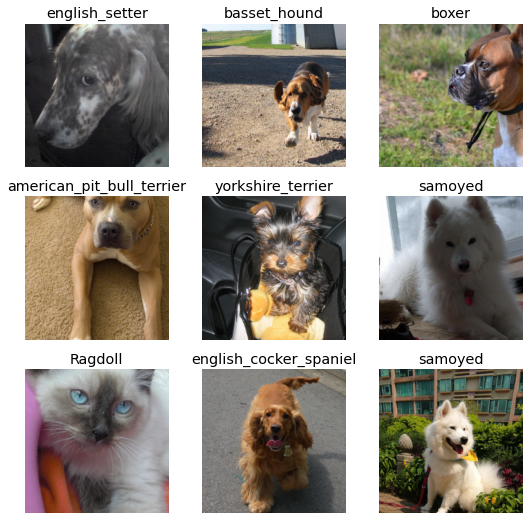

In [ ]:
#checking  and debugging the DataBlock

dls.show_batch()

In [ ]:
#we can see what is really happening behing the scenes when dealing with DataBlocks



In [ ]:
#we create a DataBlock on which we will call a DataLoaders to create the data needed for our Learner

pets_check = DataBlock (
              blocks = (ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(seed=42),
              get_y =using_attr(RegexLabeller(r'(.+)_\d+.+'),'name'),
              item_tfms=Resize(460),
              batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
pets_check.summary(path/'images')
#when we check what 

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_19.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_19.jpg
    applying partial gives
      basset_hound
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(14)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(14))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up afte